In [38]:
import os
import av
import datetime
import matplotlib.pyplot as plt

from fs.memoryfs import MemoryFS




filename = '/Users/youritomassen/Projects/xai/data/Diving48/rgb/aektxm8cLdo_00000.mp4'
filename2 =  '/Users/youritomassen/Projects/xai/data/Diving48/rgb/iv0Gu1VXAgc_00167.mp4'
assert os.path.exists(filename)

In [30]:
class MemFSCache():

    def __init__(self, mem_fs: MemoryFS):
        self.mem_fs = mem_fs


    def open(self, path):
        path = os.path.abspath(path)
        if self.mem_fs.exists(path):
            print('reading from cache')
            file = self.mem_fs.open(path, 'rb')
        else:
            print('reading from disk')
            dirname = os.path.dirname(path)
            if not self.mem_fs.exists(dirname):
                self.mem_fs.makedirs(dirname)

            with open(path, 'rb') as source_file:
                content = source_file.read()
                with self.mem_fs.open(path, 'wb') as f:
                    f.write(content)

            file = self.mem_fs.open(path, 'rb')


        return file





In [14]:
mem_fs = MemoryFS()

mem_fs.exists(filename)

os.path.dirname(filename)

'/Users/youritomassen/Projects/xai/data/Diving48/rgb'

reading from cache
took: 0:00:00.006532


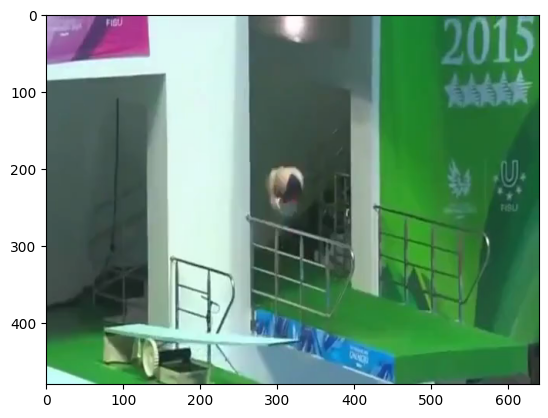

In [52]:
mem_fs_cache = MemFSCache(mem_fs)

start = datetime.datetime.now()
with mem_fs_cache.open(filename2, cache=False) as f:
    container = av.open(f)
    frame = next(container.decode(video=0))

    print(f'took: {datetime.datetime.now() - start}')
    plt.imshow(frame.to_ndarray(format='rgb24'))


In [19]:
file = open(filename, 'rb')
memdir = os.path.dirname(filename)
if not mem_fs.exists(memdir):
    mem_fs.makedirs(memdir)
with mem_fs.open(filename, 'wb') as f:
    f.write(file.read())


In [25]:
container = av.open(mem_fs.open(filename, 'rb'))



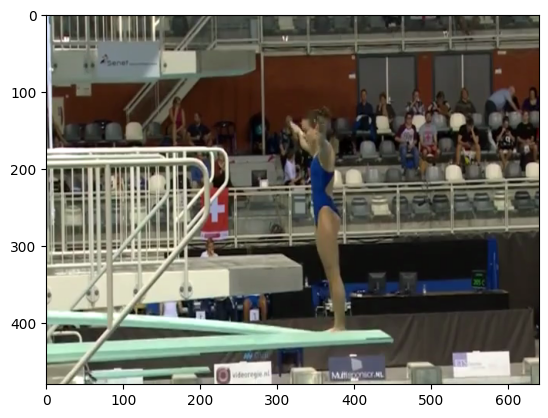

In [28]:
frame = next(container.decode(video=0))

plt.imshow(frame.to_ndarray(format='rgb24'))